#Importing libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Importing dataset

In [2]:
google = pd.read_csv('GOOGL.csv')
google.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
3927,2020-03-26,1114.719971,1171.479980,1092.030029,1162.920044,1162.920044,3828100
3928,2020-03-27,1127.469971,1151.050049,1104.000000,1110.260010,1110.260010,3139700
3929,2020-03-30,1132.640015,1151.000000,1098.489990,1146.310059,1146.310059,2936800
3930,2020-03-31,1148.729980,1173.400024,1136.719971,1161.949951,1161.949951,3261400
3931,2020-04-01,1124.000000,1129.420044,1093.489990,1102.099976,1102.099976,2597100


In [3]:
google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3932 entries, 0 to 3931
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3932 non-null   object 
 1   Open       3932 non-null   float64
 2   High       3932 non-null   float64
 3   Low        3932 non-null   float64
 4   Close      3932 non-null   float64
 5   Adj Close  3932 non-null   float64
 6   Volume     3932 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 215.2+ KB


As we have only one feature which can be independent variable we will leave only two columns 'Date' and 'Close'.

In [4]:
google.drop(['Open','High','Low','Adj Close','Volume'], axis=1, inplace=True)

In [5]:
google.head()

,Date,Close
0,2004-08-19,50.220219
1,2004-08-20,54.209209
2,2004-08-23,54.754753
3,2004-08-24,52.487488
4,2004-08-25,53.053055


#Handling categorical data

Now I will handle with categorical data which is 'Date' column. I'm going to replace string date with integers of 'Year','Month' and 'Day'

In [6]:
type(google['Date'][0])

str

Below function which will add new column for each feature: 'Year', 'Month' and 'Day'

In [7]:
def year(a):
  year = int(a.split('-')[0])
  return year

def month(a):
  month = int(a.split('-')[1])
  return month

def day(a):
  day = int(a.split('-')[2])
  return day

Let's now run the function

In [8]:
google['Year'] = google['Date'].apply(year)
google['Month'] = google['Date'].apply(month)
google['Day'] = google['Date'].apply(day)

In [9]:
google.head()

,Date,Close,Year,Month,Day
0,2004-08-19,50.220219,2004,8,19
1,2004-08-20,54.209209,2004,8,20
2,2004-08-23,54.754753,2004,8,23
3,2004-08-24,52.487488,2004,8,24
4,2004-08-25,53.053055,2004,8,25


For now I will leave 'Date' column for further purposes

##Missing Values

In [10]:
google.isnull()

,Date,Close,Year,Month,Day
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
3927,False,False,False,False,False
3928,False,False,False,False,False
3929,False,False,False,False,False
3930,False,False,False,False,False


In [11]:
google.isnull().nunique()

Date     1
Close    1
Year     1
Month    1
Day      1
dtype: int64

As we can see the only value in isnull() method is False, conclusion is that we have no missing values.

In [12]:
google.tail(30)

,Date,Close,Year,Month,Day
3902,2020-02-20,1516.989990,2020,2,20
3903,2020-02-21,1483.459961,2020,2,21
3904,2020-02-24,1419.859985,2020,2,24
3905,2020-02-25,1386.319946,2020,2,25
3906,2020-02-26,1390.469971,2020,2,26
3907,2020-02-27,1314.949951,2020,2,27
3908,2020-02-28,1339.250000,2020,2,28
3909,2020-03-02,1386.319946,2020,3,2
3910,2020-03-03,1337.719971,2020,3,3
3911,2020-03-04,1381.599976,2020,3,4


For now we have to be aware that not every dates are present in dataset, f.e. 2020-03-14, 2020-03-01 and so on.

#Train test split

Let's split the dataset into a training set and test set

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(google[['Year','Month','Day']],google['Close'])

I just want to check if everything is set properly so I will display all datasets.

In [14]:
X_train.head()

,Year,Month,Day
3900,2020,2,18
1392,2010,3,2
3040,2016,9,15
3921,2020,3,18
1062,2008,11,5


In [15]:
y_train = pd.DataFrame(y_train)
y_train.head()

,Close
3900,1519.439941
1392,270.800812
3040,801.229980
3921,1091.189941
1062,171.291290


In [16]:
X_test.head()

,Year,Month,Day
2795,2015,9,25
3713,2019,5,21
2614,2015,1,7
3113,2016,12,29
17,2004,9,14


In [17]:
y_test = pd.DataFrame(y_test)
y_test.head()

,Close
2795,640.150024
3713,1154.439941
2614,505.149994
3113,802.880005
17,55.800800


#Multivariate Linear Regression modeling

##Training

In [18]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

In [19]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Now I will predict values basing on our model and X_test data set

##Testing

In [20]:
predict = lm.predict(X_test)

I just want to display both datasets that later on we will compare to each other.

In [21]:
predict = pd.DataFrame(predict)

In [22]:
predict = pd.DataFrame(predict)
y_test = pd.DataFrame(y_test)

print(predict)
print(y_test)

               0
0     748.482176
1    1015.278179
2     698.644566
3     839.828278
4     -53.546750
..           ...
978   821.597673
979   947.831995
980    98.964891
981   352.656197
982   765.490117

[983 rows x 1 columns]
            Close
2795   640.150024
3713  1154.439941
2614   505.149994
3113   802.880005
17      55.800800
...           ...
3050   802.640015
3476  1140.900024
551    243.543549
1417   282.052063
2845   772.989990

[983 rows x 1 columns]


Let's see how our model is fitted

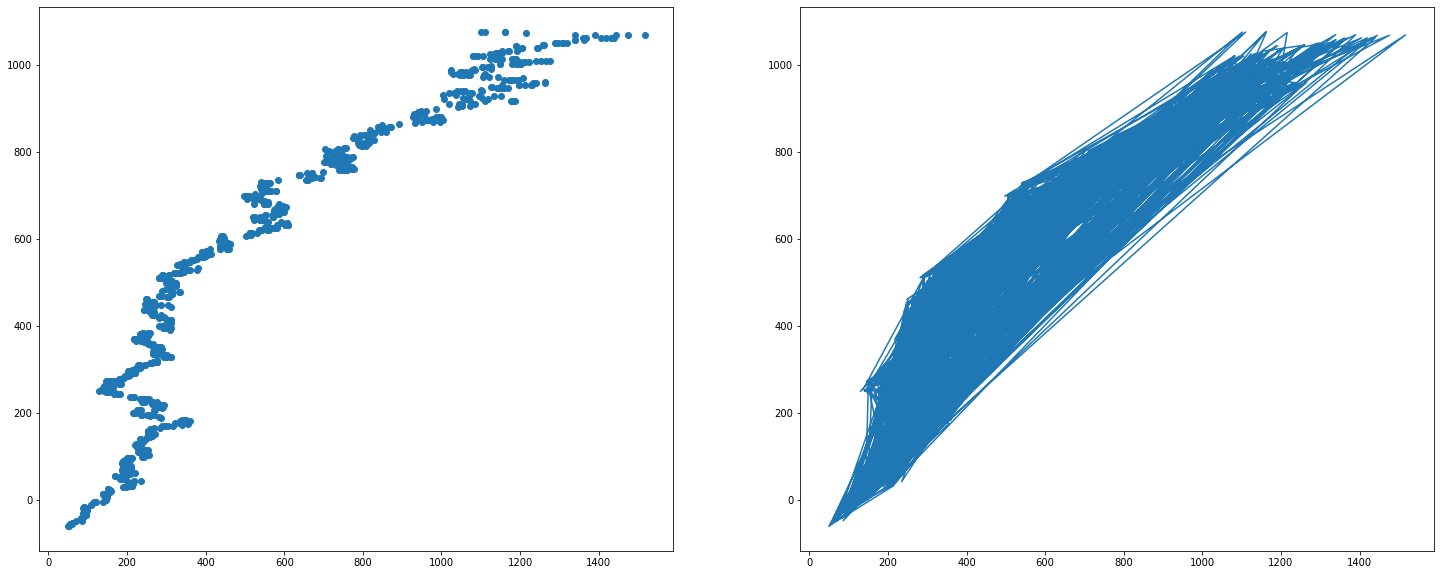

In [23]:
fig, axs = plt.subplots(1, 2, figsize=(25, 10))
axs[0].scatter(y_test, predict)
axs[1].plot(y_test, predict)
plt.show()

In [24]:
from sklearn import metrics

MAE = metrics.mean_absolute_error(y_test,predict)
MAE

119.23246416597775

In [25]:
MSE = metrics.mean_squared_error(y_test,predict)
MSE

18378.851554186054

In [26]:
MRSE = np.sqrt(metrics.mean_squared_error(y_test,predict))
MRSE

135.56862304451593

As we can see our model is not fitted quite well.

#Improving dataset

## Effective Federal Funds Rate

I will add Effectife Federal Funds Rate feature for purpose of higher quality model fitting

In [27]:
EFFR = pd.read_csv('EffectiveFederalFundsRate.csv')

In [28]:
EFFR = EFFR.rename(columns = {'DFF':'EFFR'})
EFFR

,DATE,EFFR
0,1954-07-01,1.13
1,1954-07-02,1.25
2,1954-07-03,1.25
3,1954-07-04,1.25
4,1954-07-05,0.88
...,...,...
24180,2020-09-12,0.09
24181,2020-09-13,0.09
24182,2020-09-14,0.09
24183,2020-09-15,0.09


In [29]:
google

,Date,Close,Year,Month,Day
0,2004-08-19,50.220219,2004,8,19
1,2004-08-20,54.209209,2004,8,20
2,2004-08-23,54.754753,2004,8,23
3,2004-08-24,52.487488,2004,8,24
4,2004-08-25,53.053055,2004,8,25
...,...,...,...,...,...
3927,2020-03-26,1162.920044,2020,3,26
3928,2020-03-27,1110.260010,2020,3,27
3929,2020-03-30,1146.310059,2020,3,30
3930,2020-03-31,1161.949951,2020,3,31


Now I will use inner merge to fit EFFR to dates that are present in google dataset

In [30]:
google = pd.merge(left=google, right=EFFR,left_on='Date',right_on='DATE')

In [31]:
google

,Date,Close,Year,Month,Day,DATE,EFFR
0,2004-08-19,50.220219,2004,8,19,2004-08-19,1.50
1,2004-08-20,54.209209,2004,8,20,2004-08-20,1.50
2,2004-08-23,54.754753,2004,8,23,2004-08-23,1.51
3,2004-08-24,52.487488,2004,8,24,2004-08-24,1.51
4,2004-08-25,53.053055,2004,8,25,2004-08-25,1.55
...,...,...,...,...,...,...,...
3927,2020-03-26,1162.920044,2020,3,26,2020-03-26,0.10
3928,2020-03-27,1110.260010,2020,3,27,2020-03-27,0.10
3929,2020-03-30,1146.310059,2020,3,30,2020-03-30,0.09
3930,2020-03-31,1161.949951,2020,3,31,2020-03-31,0.08


In [32]:
google.drop('DATE',axis=1,inplace=True)


In [33]:
google.head()

,Date,Close,Year,Month,Day,EFFR
0,2004-08-19,50.220219,2004,8,19,1.50
1,2004-08-20,54.209209,2004,8,20,1.50
2,2004-08-23,54.754753,2004,8,23,1.51
3,2004-08-24,52.487488,2004,8,24,1.51
4,2004-08-25,53.053055,2004,8,25,1.55


As our EFFR is given as a percentage let's just transform it into a number

In [34]:
google['EFFR'] = google['EFFR'].apply(lambda x: x/100)

In [35]:
google.tail()

,Date,Close,Year,Month,Day,EFFR
3927,2020-03-26,1162.920044,2020,3,26,0.0010
3928,2020-03-27,1110.260010,2020,3,27,0.0010
3929,2020-03-30,1146.310059,2020,3,30,0.0009
3930,2020-03-31,1161.949951,2020,3,31,0.0008
3931,2020-04-01,1102.099976,2020,4,1,0.0006


##Data adjustment due to Corona Virus crisis

Our data reaches date of 2020-04-01. Our model isn't good representation of reliable predictions because of Corona Crisis. Check out below information.

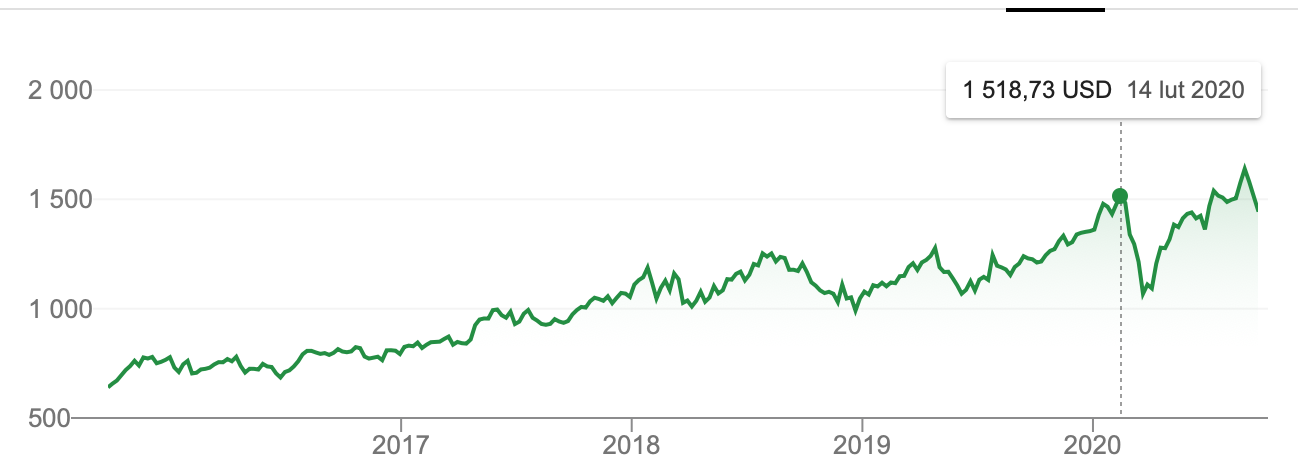

As we can see on day 14th February prices started to decline, two weeks after WHO declared the outbreak of COVID-19 to be a Public Health Emergency of International Concern and issued a set of Temporary Recommendations.

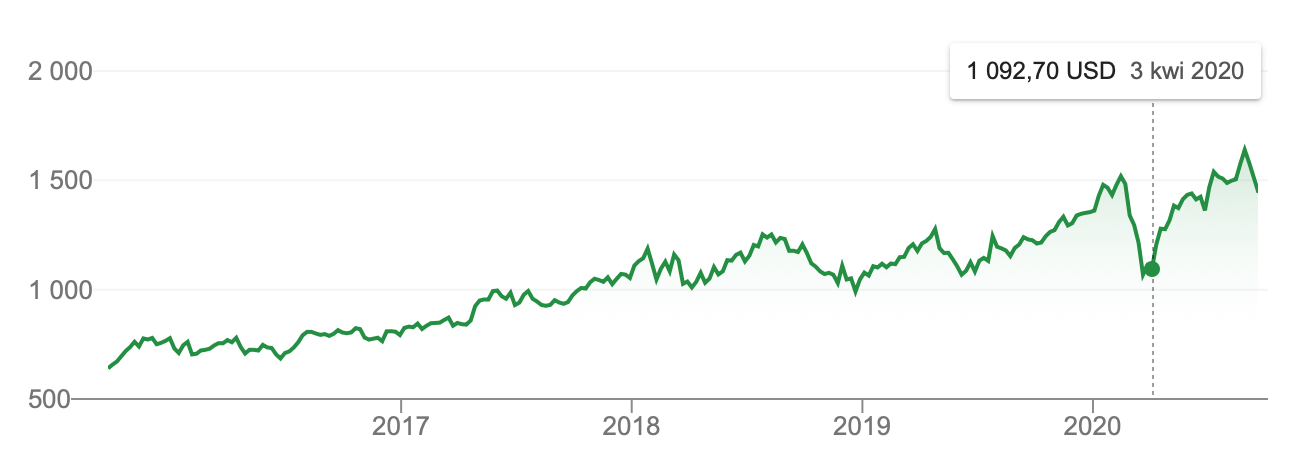

After seven weeks of first confusion and fear on the market prices started increases on April 3rd. Unfortunately our dataset includes this specific period of time, what surely will distort our predictions. Thats why I will cut the tail of our dataset until the date on which COVID-19 had too big impact on our dataset. But to be prevent underfitting of our model I will leave some market slump period.

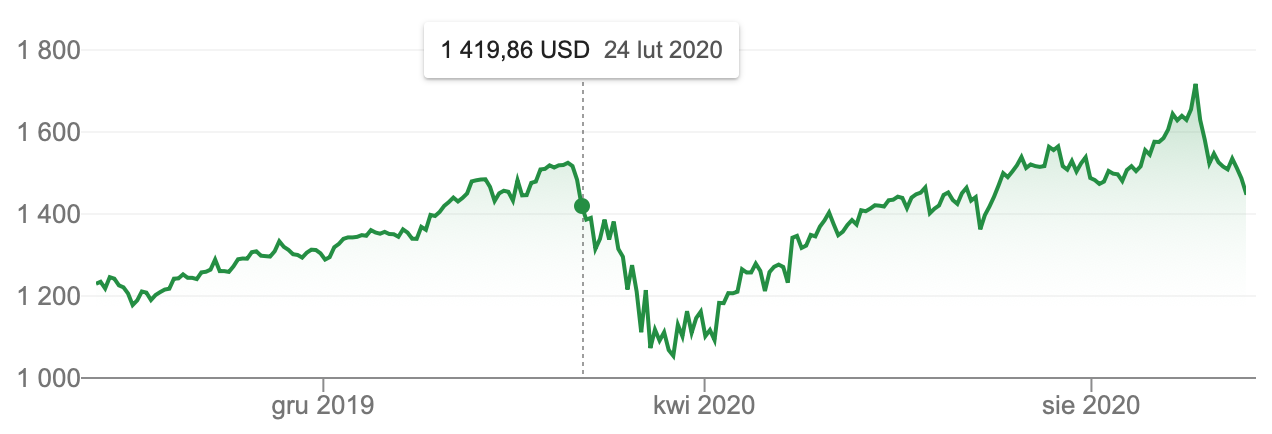

Let's say I will pick 19th of February. Till this day price drop seems to be quite representative for whole dataset.

In [36]:
google.head()

,Date,Close,Year,Month,Day,EFFR
0,2004-08-19,50.220219,2004,8,19,0.0150
1,2004-08-20,54.209209,2004,8,20,0.0150
2,2004-08-23,54.754753,2004,8,23,0.0151
3,2004-08-24,52.487488,2004,8,24,0.0151
4,2004-08-25,53.053055,2004,8,25,0.0155


In [37]:
google = google.iloc[:google.index[google['Date'] == '2020-02-19'][0]+1,:]
google

,Date,Close,Year,Month,Day,EFFR
0,2004-08-19,50.220219,2004,8,19,0.0150
1,2004-08-20,54.209209,2004,8,20,0.0150
2,2004-08-23,54.754753,2004,8,23,0.0151
3,2004-08-24,52.487488,2004,8,24,0.0151
4,2004-08-25,53.053055,2004,8,25,0.0155
...,...,...,...,...,...,...
3897,2020-02-12,1518.630005,2020,2,12,0.0158
3898,2020-02-13,1513.390015,2020,2,13,0.0158
3899,2020-02-14,1518.729980,2020,2,14,0.0158
3900,2020-02-18,1519.439941,2020,2,18,0.0159


#Renewed Multivariate Regression Modeling

##Cleaning

Now I will train my model one more time. But first some cleaning.

In [38]:
google = google[['Date','Year','Month','Day','EFFR','Close']]
google.tail()

,Date,Year,Month,Day,EFFR,Close
3897,2020-02-12,2020,2,12,0.0158,1518.630005
3898,2020-02-13,2020,2,13,0.0158,1513.390015
3899,2020-02-14,2020,2,14,0.0158,1518.729980
3900,2020-02-18,2020,2,18,0.0159,1519.439941
3901,2020-02-19,2020,2,19,0.0159,1524.869995


##Splitting the dataset

In [39]:
X_train_renewed, X_test_renewed, y_train_renewed, y_test_renewed = train_test_split(google[['Year','Month','Day','EFFR']],google['Close'])

##Training

In [40]:
lm_renewed = LinearRegression()

In [41]:
lm_renewed.fit(X_train_renewed,y_train_renewed)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

##Testing

In [42]:
predict_renewed = lm_renewed.predict(X_test_renewed)

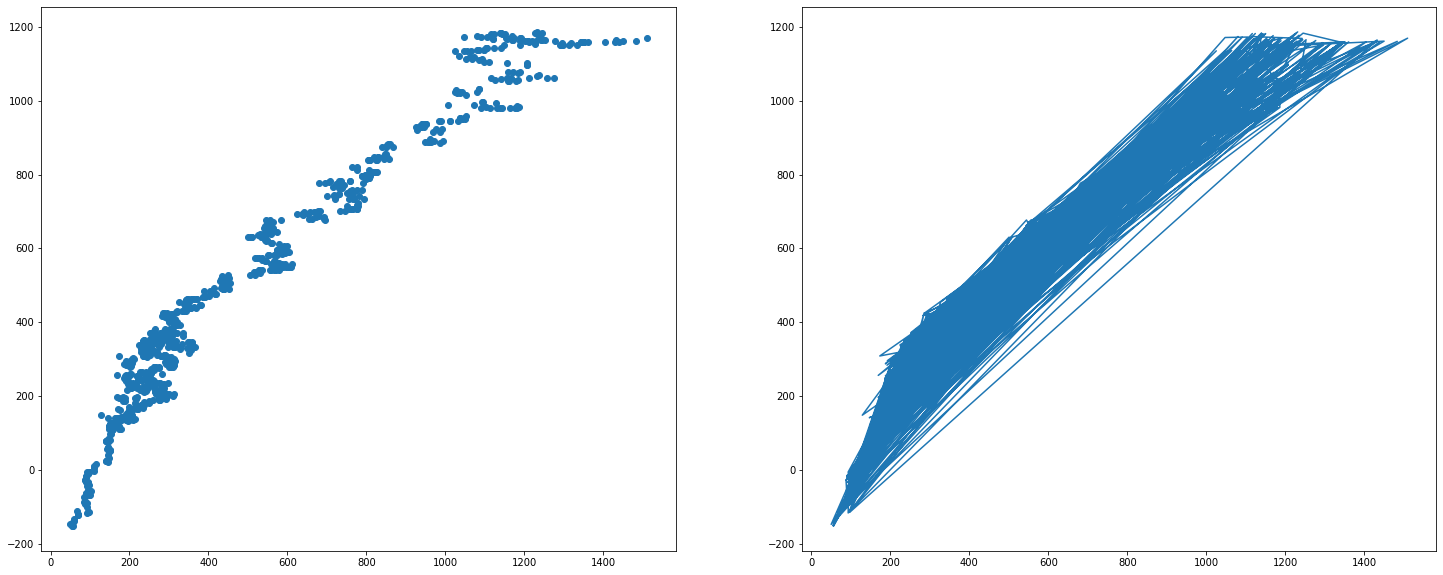

In [43]:
fig, axs = plt.subplots(1, 2, figsize=(25, 10))
axs[0].scatter(y_test_renewed, predict_renewed)
axs[1].plot(y_test_renewed, predict_renewed)
plt.show()

In [44]:
print('MAE = ',metrics.mean_absolute_error(y_test,predict))
print('MSE = ',metrics.mean_squared_error(y_test,predict))
print('MRSE = ',np.sqrt(metrics.mean_squared_error(y_test,predict)))
print('')
MAE_renewed = metrics.mean_absolute_error(y_test_renewed,predict_renewed)
MSE_renewed = metrics.mean_squared_error(y_test_renewed,predict_renewed)
MRSE_renewed = np.sqrt(metrics.mean_squared_error(y_test_renewed,predict_renewed))
print('MAE_renewed = ',MAE_renewed)
print('MSE_renewed = ',MSE_renewed)
print('MRSE_renewed = ',MRSE_renewed)
print('')
print('MAE was improved by',round(((MAE-MAE_renewed)/MAE)*100,2),'%')
print('MSE was improved by',round(((MSE-MSE_renewed)/MSE)*100,2),'%')
print('MRSE was improved by',round(((MRSE-MRSE_renewed)/MRSE)*100,2),'%')

MAE =  119.23246416597775
MSE =  18378.851554186054
MRSE =  135.56862304451593

MAE_renewed =  64.21160077807654
MSE_renewed =  6568.687223165686
MRSE_renewed =  81.04743810365437

MAE was improved by 46.15 %
MSE was improved by 64.26 %
MRSE was improved by 40.22 %


#Price predictions table for year 2020 and 2021

##Creating 2020 and 2021 whole years Data Frame

Now I want to create new DataFrame called 'whole_year' where I will ascribe proper dates for years 2020 and 2021

In [45]:
year = []

for i in range(1,367):
  year.append(2020)

month = []
day = []

for i in range(1,32):
  month.append(1)
  day.append(i)

for i in range(1,30):
  month.append(2)
  day.append(i)

for i in range(1,32):
  month.append(3)
  day.append(i)

for i in range(1,31):
  month.append(4)
  day.append(i)

for i in range(1,32):
  month.append(5)
  day.append(i)

for i in range(1,31):
  month.append(6)
  day.append(i)

for i in range(1,32):
  month.append(7)
  day.append(i)

for i in range(1,32):
  month.append(8)
  day.append(i)

for i in range(1,31):
  month.append(9)
  day.append(i)

for i in range(1,32):
  month.append(10)
  day.append(i)

for i in range(1,31):
  month.append(11)
  day.append(i)

for i in range(1,32):
  month.append(12)
  day.append(i)

#2021

for i in range(1,366):
  year.append(2021)

for i in range(1,32):
  month.append(1)
  day.append(i)

for i in range(1,29):
  month.append(2)
  day.append(i)

for i in range(1,32):
  month.append(3)
  day.append(i)

for i in range(1,31):
  month.append(4)
  day.append(i)

for i in range(1,32):
  month.append(5)
  day.append(i)

for i in range(1,31):
  month.append(6)
  day.append(i)

for i in range(1,32):
  month.append(7)
  day.append(i)

for i in range(1,32):
  month.append(8)
  day.append(i)

for i in range(1,31):
  month.append(9)
  day.append(i)

for i in range(1,32):
  month.append(10)
  day.append(i)

for i in range(1,31):
  month.append(11)
  day.append(i)

for i in range(1,32):
  month.append(12)
  day.append(i)

In [46]:
whole_year = pd.DataFrame({'Year':year,'Month':month,'Day':day})

In [47]:
whole_year

,Year,Month,Day
0,2020,1,1
1,2020,1,2
2,2020,1,3
3,2020,1,4
4,2020,1,5
...,...,...,...
726,2021,12,27
727,2021,12,28
728,2021,12,29
729,2021,12,30


##Adding EFFR column

###Preparing whole_year dataset for modeling

I want to use inner merge for EFFR and whole_year datasets. I just have to create 'DATE' column in whole_year dataset, where I will concatenate 'Year', 'Month' and 'Day' to inner merge by 'DATE' column.

In [48]:
def Date(cols):
  return ('%d-%d-%d' % (cols[0],cols[1],cols[2]))
whole_year['DATE'] = whole_year[['Year','Month','Day']].apply(Date,axis=1)

In [49]:
whole_year.head()

,Year,Month,Day,DATE
0,2020,1,1,2020-1-1
1,2020,1,2,2020-1-2
2,2020,1,3,2020-1-3
3,2020,1,4,2020-1-4
4,2020,1,5,2020-1-5


###Preparing effr dataset for data modeling

As far as US government will keep their announcement about holding interest rate near 0% through 2022 - because of COVID crisis - I've decided to set interest rate for Q4 2020 (from 19.02.2020) and 2021 from 0,08% gradually decreasing by 0,1% each day.

Source: https://www.cnbc.com/2020/06/10/fed-holds-rates-near-zero-heres-what-that-means-for-your-wallet.html

Let's first count how many rows we have to fill with 'fake rate' ergo how many days are from 2020-09-16 to 2021-12-31

In [50]:
whole_year.tail(2)

,Year,Month,Day,DATE
729,2021,12,30,2021-12-30
730,2021,12,31,2021-12-31


In [51]:
whole_year.iloc[whole_year.index[whole_year['DATE']=='2020-9-17'][0]:,:]

,Year,Month,Day,DATE
260,2020,9,17,2020-9-17
261,2020,9,18,2020-9-18
262,2020,9,19,2020-9-19
263,2020,9,20,2020-9-20
264,2020,9,21,2020-9-21
...,...,...,...,...
726,2021,12,27,2021-12-27
727,2021,12,28,2021-12-28
728,2021,12,29,2021-12-29
729,2021,12,30,2021-12-30


We have 471 days from 2020-9-17 (date from which we don't have given data) to 2021-12-31

####Creating 'fake rate' DataFrame

In [52]:
fakeRate = []

for i in range(471):
  fakeRate.append(0.0008-i*0.0008*0.001)

fakeRate = pd.DataFrame({'EFFR':fakeRate})

In [53]:
fakeRate

,EFFR
0,0.000800
1,0.000799
2,0.000798
3,0.000798
4,0.000797
...,...
466,0.000427
467,0.000426
468,0.000426
469,0.000425


####Reindexing and cleaning

Let's now change percentage values into numeric values and do some cleaning

In [54]:
EFFR.head()

,DATE,EFFR
0,1954-07-01,1.13
1,1954-07-02,1.25
2,1954-07-03,1.25
3,1954-07-04,1.25
4,1954-07-05,0.88


In [55]:
EFFR = EFFR.rename(columns={'DFF':'EFFR'})

In [56]:
EFFR['EFFR'] = EFFR['EFFR'].apply(lambda x: x/100)

In [57]:
EFFR

,DATE,EFFR
0,1954-07-01,0.0113
1,1954-07-02,0.0125
2,1954-07-03,0.0125
3,1954-07-04,0.0125
4,1954-07-05,0.0088
...,...,...
24180,2020-09-12,0.0009
24181,2020-09-13,0.0009
24182,2020-09-14,0.0009
24183,2020-09-15,0.0009


###Extracting proper data rows

In [58]:
effr_head = pd.DataFrame(EFFR.iloc[EFFR.index[EFFR['DATE']=='2020-01-01'][0]:,1])
effr_tail = fakeRate

##Predictions dataset


In [59]:
dates2021 = whole_year
effr2021 = effr_head.append(effr_tail)

In [60]:
dates2021

,Year,Month,Day,DATE
0,2020,1,1,2020-1-1
1,2020,1,2,2020-1-2
2,2020,1,3,2020-1-3
3,2020,1,4,2020-1-4
4,2020,1,5,2020-1-5
...,...,...,...,...
726,2021,12,27,2021-12-27
727,2021,12,28,2021-12-28
728,2021,12,29,2021-12-29
729,2021,12,30,2021-12-30


In [61]:
effr2021.head()

,EFFR
23925,0.0155
23926,0.0155
23927,0.0155
23928,0.0155
23929,0.0155


Now we can connect both DataFrames. But first lets reindex our predictions_effr DataFrame in order to predictions_date in case of data loss

In [62]:
effr2021 = effr2021.set_index(dates2021.index)

In [63]:
dates2021['EFFR'] = effr2021

In [64]:
data2021 = dates2021

In [65]:
data2021

,Year,Month,Day,DATE,EFFR
0,2020,1,1,2020-1-1,0.015500
1,2020,1,2,2020-1-2,0.015500
2,2020,1,3,2020-1-3,0.015500
3,2020,1,4,2020-1-4,0.015500
4,2020,1,5,2020-1-5,0.015500
...,...,...,...,...,...
726,2021,12,27,2021-12-27,0.000427
727,2021,12,28,2021-12-28,0.000426
728,2021,12,29,2021-12-29,0.000426
729,2021,12,30,2021-12-30,0.000425


In [66]:
data2021_known = data2021.iloc[:data2021.index[data2021['DATE']=='2020-4-1'][0]+1,:]
data2021_known

,Year,Month,Day,DATE,EFFR
0,2020,1,1,2020-1-1,0.0155
1,2020,1,2,2020-1-2,0.0155
2,2020,1,3,2020-1-3,0.0155
3,2020,1,4,2020-1-4,0.0155
4,2020,1,5,2020-1-5,0.0155
...,...,...,...,...,...
87,2020,3,28,2020-3-28,0.0010
88,2020,3,29,2020-3-29,0.0010
89,2020,3,30,2020-3-30,0.0009
90,2020,3,31,2020-3-31,0.0008


In [67]:
data2021_unknown = data2021.iloc[data2021.index[data2021['DATE']=='2020-4-1'][0]:,:]
data2021_unknown

,Year,Month,Day,DATE,EFFR
91,2020,4,1,2020-4-1,0.000600
92,2020,4,2,2020-4-2,0.000500
93,2020,4,3,2020-4-3,0.000500
94,2020,4,4,2020-4-4,0.000500
95,2020,4,5,2020-4-5,0.000500
...,...,...,...,...,...
726,2021,12,27,2021-12-27,0.000427
727,2021,12,28,2021-12-28,0.000426
728,2021,12,29,2021-12-29,0.000426
729,2021,12,30,2021-12-30,0.000425


In [68]:
google.tail()

,Date,Year,Month,Day,EFFR,Close
3897,2020-02-12,2020,2,12,0.0158,1518.630005
3898,2020-02-13,2020,2,13,0.0158,1513.390015
3899,2020-02-14,2020,2,14,0.0158,1518.729980
3900,2020-02-18,2020,2,18,0.0159,1519.439941
3901,2020-02-19,2020,2,19,0.0159,1524.869995


##Final multivariate linear regression modeling

Now I will use lm_renewed trained model to predict Google's stokcs' prices. To fit our predictions dataset I will create new DataFrame data2021_r without 'DATE' column

In [69]:
data2021_r = data2021
data2021_r.drop('DATE',axis=1,inplace=True)

In [70]:
data2021_r = pd.DataFrame(data2021_r)
data2021_r

,Year,Month,Day,EFFR
0,2020,1,1,0.015500
1,2020,1,2,0.015500
2,2020,1,3,0.015500
3,2020,1,4,0.015500
4,2020,1,5,0.015500
...,...,...,...,...
726,2021,12,27,0.000427
727,2021,12,28,0.000426
728,2021,12,29,0.000426
729,2021,12,30,0.000425


###Fitting to lm_renewed model

In [71]:
google_predictions = lm_renewed.predict(data2021_r)

In [72]:
google_predictions = pd.DataFrame(google_predictions)
google_predictions

,0
0,1159.068673
1,1159.167316
2,1159.265959
3,1159.364602
4,1159.463245
...,...
726,1221.587513
727,1221.680375
728,1221.773237
729,1221.866099


## Whole data set

In [73]:
data2021["Predicted stocks' prices"] = google_predictions
data2021

,Year,Month,Day,EFFR,Predicted stocks' prices
0,2020,1,1,0.015500,1159.068673
1,2020,1,2,0.015500,1159.167316
2,2020,1,3,0.015500,1159.265959
3,2020,1,4,0.015500,1159.364602
4,2020,1,5,0.015500,1159.463245
...,...,...,...,...,...
726,2021,12,27,0.000427,1221.587513
727,2021,12,28,0.000426,1221.680375
728,2021,12,29,0.000426,1221.773237
729,2021,12,30,0.000425,1221.866099


#Data visualization

##To datetime

In [74]:
def Date(cols):
  Year = cols[0]
  Month = cols[1]
  Day = cols[2]

  if Day <= 9:
    d = '%d%d'%(0,Day)
  else:
    d = str(Day)
  if Month <= 9:
    m = '%d%d'%(0,Month)
  else:
    m = str(Month)

  return ('%d-%s-%s' % (Year,m,d))

In [75]:
data2021['DATE'] = data2021[['Year','Month','Day']].apply(Date,axis=1)
data2021

,Year,Month,Day,EFFR,Predicted stocks' prices,DATE
0,2020,1,1,0.015500,1159.068673,2020-01-01
1,2020,1,2,0.015500,1159.167316,2020-01-02
2,2020,1,3,0.015500,1159.265959,2020-01-03
3,2020,1,4,0.015500,1159.364602,2020-01-04
4,2020,1,5,0.015500,1159.463245,2020-01-05
...,...,...,...,...,...,...
726,2021,12,27,0.000427,1221.587513,2021-12-27
727,2021,12,28,0.000426,1221.680375,2021-12-28
728,2021,12,29,0.000426,1221.773237,2021-12-29
729,2021,12,30,0.000425,1221.866099,2021-12-30


In [76]:
from datetime import datetime

data2021['DATE'] = data2021['DATE'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
data2021

,Year,Month,Day,EFFR,Predicted stocks' prices,DATE
0,2020,1,1,0.015500,1159.068673,2020-01-01
1,2020,1,2,0.015500,1159.167316,2020-01-02
2,2020,1,3,0.015500,1159.265959,2020-01-03
3,2020,1,4,0.015500,1159.364602,2020-01-04
4,2020,1,5,0.015500,1159.463245,2020-01-05
...,...,...,...,...,...,...
726,2021,12,27,0.000427,1221.587513,2021-12-27
727,2021,12,28,0.000426,1221.680375,2021-12-28
728,2021,12,29,0.000426,1221.773237,2021-12-29
729,2021,12,30,0.000425,1221.866099,2021-12-30


In [77]:
type(data2021.iloc[0,-1])

pandas._libs.tslibs.timestamps.Timestamp

In [78]:
ts = data2021[["DATE","Predicted stocks' prices"]]
ts

,DATE,Predicted stocks' prices
0,2020-01-01,1159.068673
1,2020-01-02,1159.167316
2,2020-01-03,1159.265959
3,2020-01-04,1159.364602
4,2020-01-05,1159.463245
...,...,...
726,2021-12-27,1221.587513
727,2021-12-28,1221.680375
728,2021-12-29,1221.773237
729,2021-12-30,1221.866099


In [79]:
type(ts['DATE'])

pandas.core.series.Series

In [80]:
ts.DATE = pd.to_datetime(ts.DATE)
ts.set_index('DATE',inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


##Final plot

In [81]:
fig = plt.figure(figsize=(25,10))

plt.xlabel("Date")
plt.ylabel('Stock price')
plt.plot(ts)
plt.savefig('google_predict.png')
plt.close(fig)

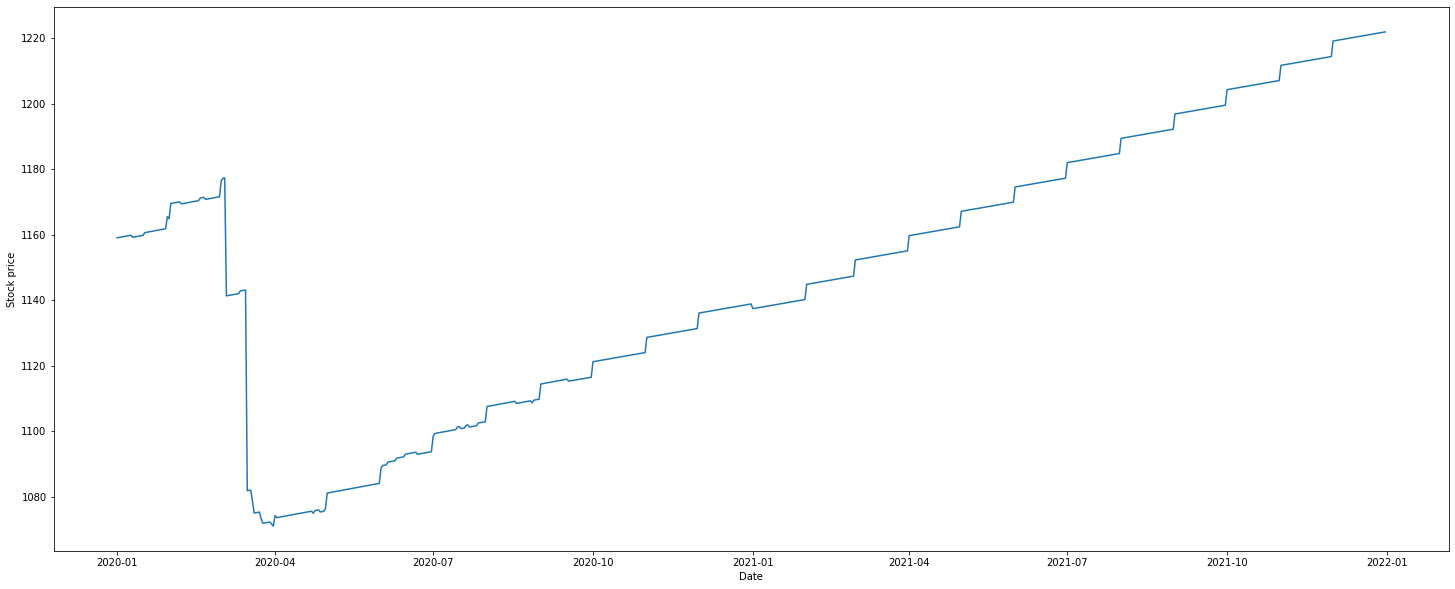

In [82]:
fig = plt.figure(figsize=(25,10))

plt.xlabel("Date")
plt.ylabel('Stock price')
plt.plot(ts)
plt.savefig('google_predict.png')

As we can see our model predicted slump due to COVID-19 correctly. Ofcourse I used unknown data that time, information about Effective Federal Funds Rate. According to very low EFFR model was able to predict upcoming outbreak.